<a href="https://colab.research.google.com/github/VedantBatra/Auto-Layout-Calculator/blob/master/Copy_of_Football_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip is package installer for python
!pip install pandas seaborn squarify

In [ ]:
import json  #to work and manipulate the json files
from pandas.io.json import json_normalize  #in order to access the data that is stored using pandas library
import numpy as np #to work with arrays containing player info
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [ ]:
#defining a function to draw the football pitch
def draw_pitch(ax):
    # size - 120 by 80

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left wing Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right wing Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Preparing Arcs
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

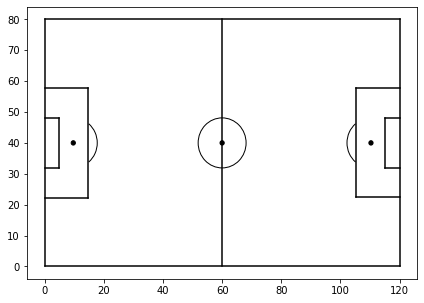

In [ ]:
#using the above function to plot the football field.
fig=plt.figure()  #create a figure object for plotting purpose
fig.set_size_inches(7, 5) #specify the width and height.
ax=fig.add_subplot(1,1,1) #to draw a 1x1 plot at position 1.
draw_pitch(ax) #pass the ax object as a paramter in the above function
plt.show() #display the plot (football field)

In [ ]:
#loading the json file
with open('./Barcelona_Vs_Eibar.json') as data_file:    
    data = json.load(data_file)

In [ ]:
import pandas

In [ ]:
#normalise the json file so that it is easy access the variables in the json file that are present inside a particular object.
df = pandas.json_normalize(data, sep = "_")
ivan_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Ivan Rakitić')] # get passing information of Ivan
pass_column = [i for i in df.columns if i.startswith("pass")]
ivan_pass = ivan_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]] #get the required attributes.
ivan_pass.head() #display the top elements of ivan_pass 

,id,period,timestamp,location,pass_end_location,pass_recipient_name
124,868a4781-523a-47df-b059-fd41a2376529,1,00:02:05.051,"[36.0, 58.0]","[42.0, 50.0]",Lionel Andrés Messi Cuccittini
134,4f698a64-ef1f-4436-beb9-8c142c60db57,1,00:02:07.369,"[39.0, 50.0]","[36.0, 42.0]",Sergio Busquets i Burgos
251,c3181ae9-fc8e-4bcb-b94f-7e1043c245cb,1,00:05:02.846,"[76.0, 74.0]","[76.0, 69.0]",Lionel Andrés Messi Cuccittini
289,236226b9-5010-490c-a7b0-3a4b75ea8bc6,1,00:05:57.039,"[69.0, 51.0]","[76.0, 57.0]",Lionel Andrés Messi Cuccittini
348,4aed0a7d-15d3-4620-9a0c-db36ecc3cc03,1,00:07:14.039,"[57.0, 71.0]","[84.0, 61.0]",NaN


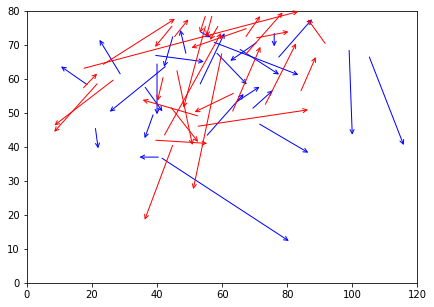

In [ ]:
fig, ax = plt.subplots() 
fig.set_size_inches(7, 5)
ax.set_xlim([0,120]) #set the X coordinate limit 
ax.set_ylim([0,80]) #set the Y coordinate limit
for i in range(len(ivan_pass)): #iterate over the array
    # can also differentiate by color
    color = "blue" if ivan_pass.iloc[i]['period'] == 1 else "red" #if the pass by the player is successful then mark arrow with blue else red
    ax.annotate("", xy = (ivan_pass.iloc[i]['pass_end_location'][0], ivan_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (ivan_pass.iloc[i]['location'][0], ivan_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),) #mention the symbol of connection.
plt.show()

In [ ]:
#store the information of a specific player into a variable called sergio_action.
sergio_action = df[(df['player_name']=='Sergio Busquets i Burgos')][["id", "type_name","period", "timestamp", "location"]] 
sergio_action.head() 

,id,type_name,period,timestamp,location
16,1a50780c-fa52-4488-a5c3-e3c921a8e445,Ball Receipt*,1,00:00:09.938,"[37.0, 58.0]"
17,0ba8a791-cd2b-4605-9e4f-e49011896eec,Carry,1,00:00:09.938,"[37.0, 58.0]"
18,e8a99341-16b6-4610-abc6-0c9f1b0420f9,Pass,1,00:00:09.955,"[38.0, 58.0]"
135,d09c3b70-1641-49c7-b54c-023a65caab98,Ball Receipt*,1,00:02:08.382,"[36.0, 42.0]"
136,e069579f-3728-4b1c-860a-945855ff52bc,Carry,1,00:02:08.382,"[36.0, 42.0]"


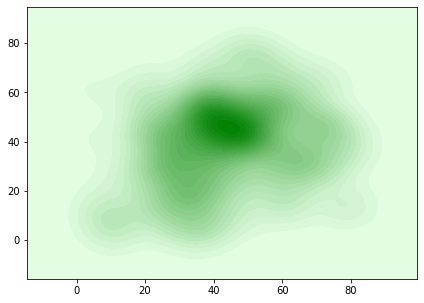

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in sergio_action["location"]] #collect the x coordinates of the specified player in variable x_coord
y_coord = [i[1] for i in sergio_action["location"]] #collect the x coordinates of the specified player in variable y_coord

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks. It is used to remove the contour lines.
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30) 
plt.show()

In [ ]:
#defining a function to show heat map of a particular player
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

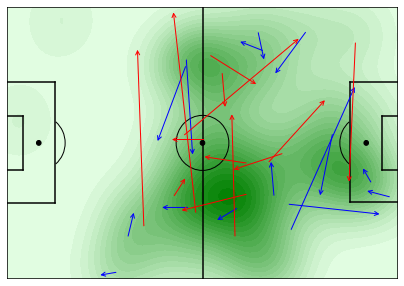

In [ ]:
heat_pass_map(df, 'Luis Alberto Suárez Díaz') #get the heat map of player Luis Suarez

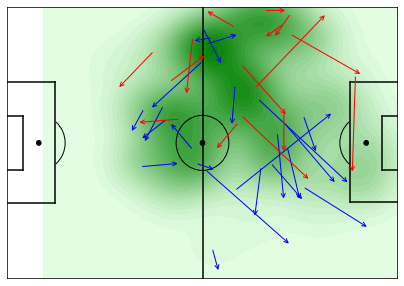

In [ ]:
heat_pass_map(df, 'Lionel Andrés Messi Cuccittini') #get the heat map of player Lionel Andres Messi